In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:/Users/User/OneDrive/Desktop/DA Intern @ ApexPlanet/Task - 2/Walmart_Sales.csv")

# Convert date
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Month'] = df['Date'].dt.month_name()

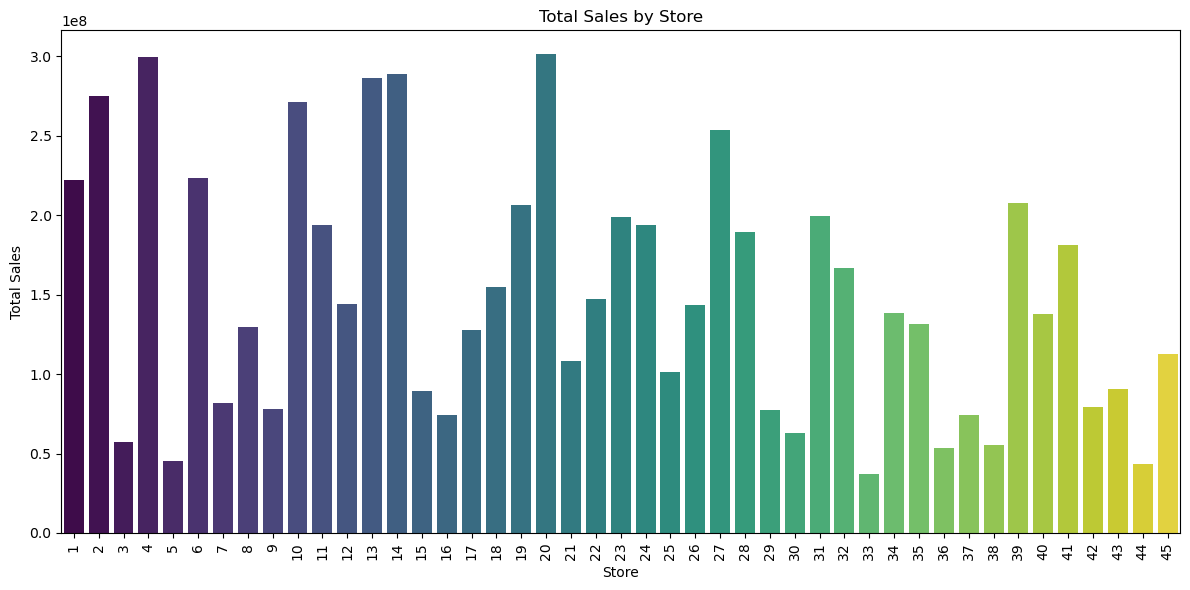

In [17]:
plt.figure(figsize=(12,6))

store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

sns.barplot(
    data=store_sales, 
    x='Store', 
    y='Weekly_Sales', 
    hue='Store',          # required in seaborn 0.14+
    palette='viridis', 
    legend=False          # hide useless legend
)

plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

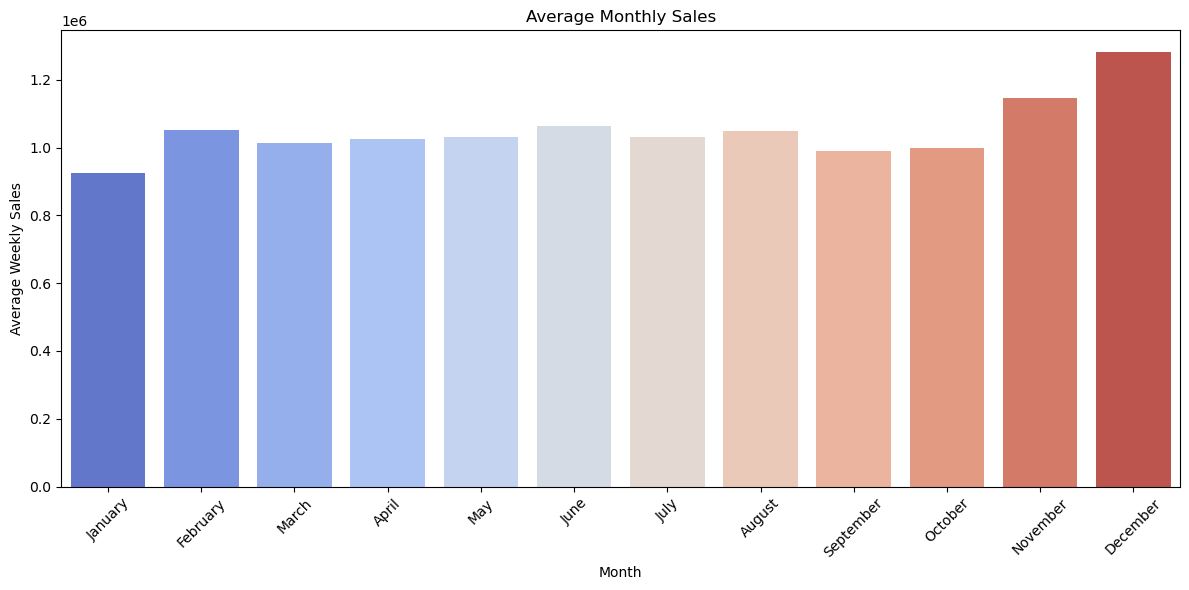

In [20]:
plt.figure(figsize=(12,6))

monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Sort by month order instead of alphabetical
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_sales['Month'] = pd.Categorical(
    monthly_sales['Month'], 
    categories=month_order, 
    ordered=True
)

monthly_sales = monthly_sales.sort_values('Month')

sns.barplot(
    data=monthly_sales, 
    x='Month', 
    y='Weekly_Sales',
    hue='Month',          # REQUIRED in seaborn 0.14+
    palette='coolwarm',
    legend=False          # hide legend (all unique anyway)
)

plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


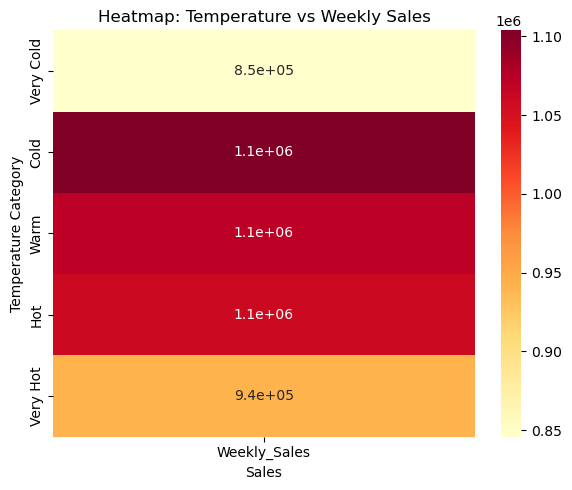

In [22]:
# Create temperature bins
df['Temp_Bin'] = pd.cut(
    df['Temperature'],
    bins=[-10, 20, 40, 60, 80, 120],
    labels=['Very Cold', 'Cold', 'Warm', 'Hot', 'Very Hot']
)

# Aggregate sales by temperature bins (fixed warning using observed=False)
temp_sales = df.groupby('Temp_Bin', observed=False)['Weekly_Sales'].mean().reset_index()

# Convert to pivot for heatmap
pivot = temp_sales.pivot_table(
    values='Weekly_Sales',
    index='Temp_Bin',
    observed=False               # FIX: prevents future warning
)

plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Heatmap: Temperature vs Weekly Sales')
plt.xlabel('Sales')
plt.ylabel('Temperature Category')
plt.tight_layout()
plt.show()

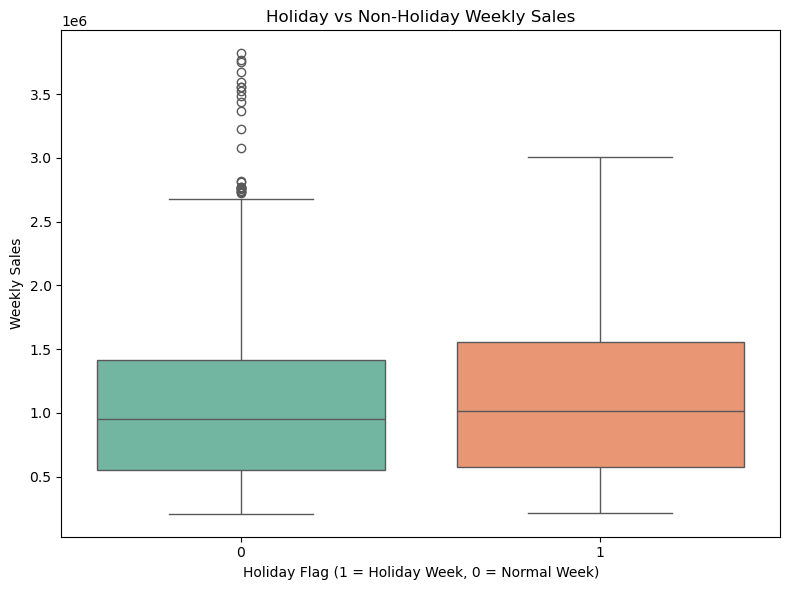

In [24]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df, 
    x='Holiday_Flag', 
    y='Weekly_Sales', 
    hue='Holiday_Flag',      # needed for seaborn 0.14+
    palette='Set2',
    legend=False             # hide duplicate legend
)

plt.title('Holiday vs Non-Holiday Weekly Sales')
plt.xlabel('Holiday Flag (1 = Holiday Week, 0 = Normal Week)')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()